## Part 3: Markov Chain Analysis Based on One Dimensional CA model:

### Table of Contents  <a name="index"></a>
  * [1.Introduction of S-E-I-R Model](#01)
  * [2.Introduction of Markov Chain Model](#02)
      - [2.1 Assumptions of Markov Chain Analysis](#021)
      - [2.2 State in Markov Chain](#022)
      - [2.3 Transition Matrix](#023)
  * [3. Simulation](#03)
  * [4. Analysis](#04)
      - [04.1 Visualization of Transition Matrix](#041)
      - [04.2 Infection Rate](#042)
      - [04.3 Steady State](#043)
  * [5. Conclusion](#05)
 
 ## 1. Introduction of S-E-I-R Model<a name="01"></a>
SEIR model is a common simulation model in computer simulation of epidemics. This SEIR models people in four states, which are susceptible, exposed, infected, and resistant. People will have their own state at each unit time and each state also represents the amount of people in this state.<br><br>
In the study of COVID-19 using SEIR model and Markov Chain, there are assumptions. The first one is that people who recoverd will be immutable. The second assumption is death and birth rate are not considered in this model.<br><br>
S - the total amount of susceptible people<br>
E - the total amount of exposed people<br>
I - the total amount of infected people<br>
R - the total amount of recovered people<br><br>
The mathmatical expression of SEIR model is described below.<br>
\begin{align*}
&\frac{dS}{dt} = -\frac{\beta SI}{N}\\
&\frac{dE}{dt} = \frac{\beta SI}{N} - \alpha E\\
&\frac{dI}{dt} = \alpha E - \lambda I\\
&\frac{dR}{dt} = \lambda I\\
&N = S + E + I + R
\end{align*}
SEIR represents people's different states. S represents people who are able to contract with the disease. E represents people who are infected but not yet infectious. I represents people who are infected and infectious. R represents people who are recovered. N represents the total amount of people. $\beta$ represents the probability that a suscepptible person is infected by a infected person. $\alpha$ represents the probability that a exposed person becomes infectious. $\lambda$ represents the probability that a infected person recovered.
\begin{align*}
P_j = \sum_{i=0}{j = n} P_i * Pij
\end{align*}

## 2. Introduction of Markov Chain Model<a name="01"></a>
In order to implement and analyse the SEIR model, Markov Chain method is implemented. In this section, COVID-19 progression is assumed to follow a discrete time Markov chain with stationary transition probabilities[1], which is represented as: ${X(t), t ∈ T}$ with time index set $T ={0,1,…}$ and a finite state space $S ={S_1,S_1,…,S_N}$. The Markov Chain model satisfies the rules that the probability of the random variable X being in the state $S_i$ at time t depends on the X's state at time t-1.<br><br>
In the study of COVID-19, $\sum$ is used to represents the space of all states. A 1-D system is built to represent the state in the Markov Chain Model. Each element in the array, which is of length n, represents a person and the value of the element represents the state of that person.<br><br>
In the Markov Chain System, there are $n$ people in the system and they are distributed in a one dimensional array. $\sum$ is the state space and $\sigma \in \sum$ represents a state. $\sigma = (g_1,g_2,...,g_nm)$ and $g_i \in(S,E,I,R)$. $S$ means that the person is susceptible. $E$ represents the person has been exposed but not tested. $I$ means that the person has been infected and tested positive. $R$ means that the person has recovered. In the system, an $n$ array are used to represent people. Each person in the matrix will has their own state, which could be susceptible, exposed, infected or recovered. Then the matrix that contains everyone's state is called a state of Markov Chain.<br><br>
A sample state is given below. Assume there are 5 people and an array with length 5 is built.<br><br>
\begin{align*}
\sigma = \begin{bmatrix}
    0&1&2&1&3
\end{bmatrix}
\end{align*}
$S=0, E = 1, I = 2, R = 3$.

##### Reference:
[1] A. Vivanco-Lira, “Predicting covid-19 distribution in mexico through a discrete and time-dependent markov chain and an sir-like model,” 2020.

[2] Bendtsen Cano, S. Cano Morales, and C. Bendtsen, “Covid-19 modelling: the effects of socialdistancing,”medRxiv, 2020

### 2.1 Assumptions of Markov Chain Analysis<a name="021"></a>
1. An infected person only infects his adjacent neighbours.<br><br>
2. People who recovered from the disease will be immutable.

### 2.2 State in Markov Chain<a name="022"></a>
For a 1-D system, there are $n$ people and each person will have 4 posible states. Therefore, the states of Markov Chain model will be $4^n$.

As you can see, the n people are in the one dimensional array. And the number of states limit the Markov Chain's scalability. This model is not applicable to the large scale problem.

In [257]:
import numpy as np
import scipy as sp
import scipy.sparse
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import random
# define parameters
S = 0
E = 1
I = 2
R = 3
n = 4

#get possible values of a cell
values = list (range(S,R+1));
# Generate Sigma
sigma = set (itertools.product(values, repeat=n));

#print the basic information of this example
print ("There are ", n, " people in this case. They are distributed in a ",n," elements array.\n")
print ("There are ",len(sigma)," states.\n")

#transfer a matrix to a string
def convert_state_to_string (state):
    str1 = ""   
    for ele in state:
        ele = int(ele)
        str1 += str(ele)  
    return str1  
    
#transfer a string to a matrix
def convert_string_to_state (str):
    return [int(x) for x in str if x.isdigit()]

#generate all the states and save them into a hash map
map = {}
index2str = {}
str2index = {}
i = 0
for state in sigma:
    map[convert_state_to_string(state)] = state
    index2str[i] = convert_state_to_string(state)
    str2index[convert_state_to_string(state)] = i
    i += 1
    

There are  4  people in this case. They are distributed in a  4  elements array.

There are  256  states.



### 2.3 Transition Matrix <a name="023"></a>
The key of Markov Chain Model is the transition matrix and transition matrix is a square matrix. Each column/row is a state. In another word, the matrix will have $4^n$ rows and $4^n$ columns if there are n person in this system. Each element in the transition matrix represents the probability that a state goes to another state.

The limit of markov chain model is that the problem can not be scaled. In order to compute the transition matrix, the time complexity is $O(4^n)$, which is very expensive. Therefore, it can only be applied to small scale problem.<br><br>

Let use A to denote the transition matrix.<br><br>
\begin{align*}
A = \begin{bmatrix}
    \sigma_{1,1}&\sigma_{1,2}& ... &\sigma_{1,4^n}\\
    \sigma_{2,1}&\sigma_{2,2}& ... &\sigma_{2,4^n}\\
    \vdots&\vdots& \ddots &\vdots\\
    \sigma_{4^n,1}&\sigma_{4^n,2}& ... &\sigma_{4^n,4^n}\\
\end{bmatrix}
\end{align*}

Based on the analysis of real world data, the parameters of the model are predefined. Since the Markov Chain Analysis is based on the one dimensional CA model, which is discussed in the Part2, most of the parameters are lined up with what are in the Part2. These predefined parameters are derived from the real world data.<br><br>
The meaning of these parameters should be clarified. In our simulation, we define that the time unit of one state transition is one day. Therefore, the meaning of these parameters is the probability that a person changes from one state to another state in one day.


In [260]:
P_E2R = 0.40
P_E2I = 0.20
P_I2R = 0.90
P_SByE = 0.8
P_SByI = 0.9

Trans_Matrix = np.zeros(shape=(len(sigma),len(sigma)))

def checkE (i, src):
    count = 0
    if i != 0:
        if (src[i-1] == E):
            count += 1
    if i != n-1:
        if (src[i+1] == E):
            count += 1 
    return count

def checkI (i, src):
    count = 0
    if i != 0:
        if (src[i-1] == I):
            count += 1
    if i != n-1:
        if (src[i+1] == I):
            count += 1
    return count


def get_prob(src, dest, i, prob):
    s = src[i]
    d = dest[i]
    ##check edge case
    if s == R and d != R:
        prob = 0
        return prob
    elif s == I and d < I:
        prob = 0
        return prob
    elif s == E and d < E:
        prob = 0
        return prob
    elif s == S and d == R:
        prob = 0
        return prob
    elif s == S and d == I:
        prob = 0
        return prob

    ##check neighbor
    countE = checkE(i,src)
    countI = checkI(i,src)
    if s == R:
        prob = prob * 1
    elif s == I and d == I:
        prob = prob * (1 - P_I2R)
    elif s == I and d == R:
        prob = prob * P_I2R
    elif s == E and d == E:
        prob = prob * (1 - P_E2R - P_E2I)
    elif s == E and d == I:
        prob = prob * P_E2I
    elif s == E and d == R:
        prob = prob * P_E2R
    elif s == S and d == E:
        prob = prob * (1-(1-P_SByE)**countE * (1-P_SByI)**countI)
    elif s == S and d == S:
        prob = prob * (1-P_SByE)**countE * (1-P_SByI)**countI
        
    return prob

#Given conditional probabilities, a transition matrix will be computed.
for sc in range(len(sigma)):
    for dc in range(len(sigma)):
        src = map[index2str[sc]]
        dest = map[index2str[dc]]
        prob = 1
        for i in range(len(src)):
            prob = get_prob(src, dest, i, prob)
        Trans_Matrix[sc,dc] = prob

## 3. Simulation<a name="03"></a>
In this section, we will implement Markov Chain Analysis on the one dimensional case and there are n people in the one dimensional space. Because limit of the number of states and the size of transition matrix, the computation of our simulation is evey expensive. To avoid the scalability problem, we choose the scenario that only a small number of people are involved, like home or office.<br><br>
Based on the transition matrix, the Markov Chain Simulation can be implemented. There are two main simulations we focused on. One is the simulation the change of number of current infected prople in the small community as time passes by. Another is to discusse the probability that all people get infected. <br><br>
Initial State: One infected person will be chosen among the n people and will be randomly assign to a position.
Steady State: After running many times, the simulation will reach a steady state. <br><br>
The probability matrix at steady state means the probability of the markov chain state. 
Let use v denote the initial state, which is a $4^n$ vector. A is the transition matrix. S is probability vector at steady state.<br><br>
\begin{align*}
S = vA^n
\end{align*}

First, we need to generate the inital state randomly. We assume that there is only one exposed person in the community we studied. And the position of this person is randomly generated.

In [261]:
#generate initial state
poll = [0] * n
for i in range(len(poll)):
    poll[i] = i
initial_infected = random.choice(poll)
temp = [0] * n
temp[initial_infected] = 2
initial_state_index = str2index[convert_state_to_string(temp)]
v = np.zeros(shape=(len(sigma),1))
v[initial_state_index] = 1
res = v.transpose()
tres = v.transpose()
#res = v*Trans_Matrix
i = 0
while i < 80:
    tres = np.matmul(tres,Trans_Matrix)
    i += 1

print("Initial State: ",map[convert_state_to_string(temp)])
print("Steady State: ")
for i in range(len(tres[0])):
    print(" state: ",map[index2str[i]], " probability: ", tres[0,i]);
    
print("Initial State: ",map[convert_state_to_string(temp)])
print("Steady State: ")
for i in range(len(tres[0])):
    if ( tres[0,i] > 0.00001):
        print(" state: ",map[index2str[i]], " probability: ", tres[0,i]);

In [264]:
#res = v*Trans_Matrix
def countInfected(list):
    countInf = 0
    for i in range(len(list)):
        if(list[i] == 1 or list[i] == 2):
            countInf += 1 
    return countInf
        
    
def unittest_StateBase(days, Trans_Matrix, temp, res):
    print("Initial State: ",map[convert_state_to_string(temp)])
    
    tempres = res
    dcount = 0
    prob_numInf = {}
    X_days = [i+1 for i in range(days)]
    for i in range(n):
        tempArray = [0 for i in range(days)]
        prob_numInf[i] = tempArray
    
    
    while dcount < days:
        tempres = np.matmul(tempres,Trans_Matrix)

        proOfnumInfected = [0 for i in range(n)]
        for i in range(len(tempres[0])):  
            index = countInfected(map[index2str[i]]) - 1
            proOfnumInfected[index] += tempres[0,i]
            
        for i in range(n):
            tempArray = prob_numInf[i]
            tempArray[dcount] = proOfnumInfected[i]
        dcount += 1
    
    
    ##plot
    fig2, ax2 = plt.subplots( dpi = 150)
    for i in range(n):
        plt.plot(X_days, prob_numInf[i])
    labels = ["Number of Infected people is: "+str(i+1) for i in range(n)]
    plt.legend(labels)
    ax2.yaxis.set_major_formatter(PercentFormatter(1))
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set_title("Probability of the  number of currently infected people vs Number of Days",fontsize = 10)
    plt.ylabel('Probability of the number of currently infected people', fontsize=10)
    plt.xlabel('Number of Days', fontsize=10)
    
    maxState = map[index2str[0]]
    maxProb = tempres[0,0]
    for i in range(len(map)): 
        if (tempres[0,i] > maxProb):
            maxState = map[index2str[i]]
            maxProb = tempres[0,i]      
            
    for i in range(days):
        print("At day ",i,", the probability of ",n," people are currently infected is ",prob_numInf[n-1][i])

In [265]:
def countInfected_AllIncluded(list):
    countInf = 0
    for i in range(len(list)):
        if(list[i] > 0):
            countInf += 1 
    return countInf
        
    
def unittest_AllInfected(days, Trans_Matrix, temp, res):
    print("Initial State: ",map[convert_state_to_string(temp)])
    
    tempres = res
    dcount = 0
    prob_numInf = {}
    X_days = [1+i for i in range(days)]
    for i in range(n):
        tempArray = [0 for i in range(days)]
        prob_numInf[i] = tempArray
    
    
    while dcount < days:
        tempres = np.matmul(tempres,Trans_Matrix)

        proOfnumInfected = [0 for i in range(n)]
        for i in range(len(tempres[0])):  
            index = countInfected_AllIncluded(map[index2str[i]]) - 1
            proOfnumInfected[index] += tempres[0,i]
            
        for i in range(n):
            tempArray = prob_numInf[i]
            tempArray[dcount] = proOfnumInfected[i]
        dcount += 1
    
    ##plot
    fig2, ax2 = plt.subplots( dpi = 150)
    for i in range(n):
        plt.plot(X_days, prob_numInf[i])
    labels = ["Number of people who got infected is: "+str(i+1) for i in range(n)]
    plt.legend(labels)
    ax2.yaxis.set_major_formatter(PercentFormatter(1))
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set_title("Probability of the  number of people who got infected vs Number of Days",fontsize = 10)
    plt.ylabel('Probability of the  number of people who got infected', fontsize=10)
    plt.xlabel('Number of Days', fontsize=10)
    
    maxState = map[index2str[0]]
    maxProb = tempres[0,0]
    for i in range(len(map)): 
        if (tempres[0,i] > maxProb):
            maxState = map[index2str[i]]
            maxProb = tempres[0,i]   
    
    for i in range(days):
        print("At day ",i,", the probability of ",n," people who got infected is ",prob_numInf[n-1][i])
    print("The most likly state is : ",maxState, " and the probability: ", maxProb); 

## 4 Analysis<a name="04"></a>
### 4.1 Visualization of Transition Matrix<a name="041"></a>

The transition matrix is plot below.

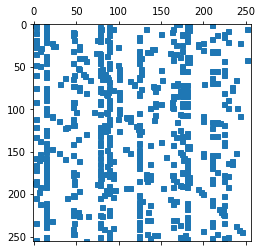

In [266]:
plt.spy (Trans_Matrix, markersize=5, precision=.1)

As you can see the transision matrix, the x-axis and y-axis represent the id of states. The meaning of element $P(i,j)$ in this transition matrix is that the probability state i jumps to state j. 

### 4.2 Infection Rate<a name="042"></a>
In this case, we calculate relationship between the number of currently infected people and time. The transition probability will be updated once per day. By adding up the probability of all states with i infected person, the probability of i people are currently infected can be calculated.<br><br>
As you can see in the following fiture, the curve reaches to the steady state really fast. It means that the infection rate of COVID-19 is really high and it only take fews days the entire family or people in a office will be infected if any one of them was exposed in the beginning.

Initial State:  (0, 0, 2, 0)
At day  0 , the probability of  4  people are currently infected is  0.008999999999999996
At day  1 , the probability of  4  people are currently infected is  0.07666019999999998
At day  2 , the probability of  4  people are currently infected is  0.29362590828
At day  3 , the probability of  4  people are currently infected is  0.6152146243427521
At day  4 , the probability of  4  people are currently infected is  0.8256947070189521
At day  5 , the probability of  4  people are currently infected is  0.9268266147959962
At day  6 , the probability of  4  people are currently infected is  0.9701801401135591
At day  7 , the probability of  4  people are currently infected is  0.98798578299405
At day  8 , the probability of  4  people are currently infected is  0.9951808153210284
At day  9 , the probability of  4  people are currently infected is  0.9980702065645658
At day  10 , the probability of  4  people are currently infected is  0.9992277482351931
At day

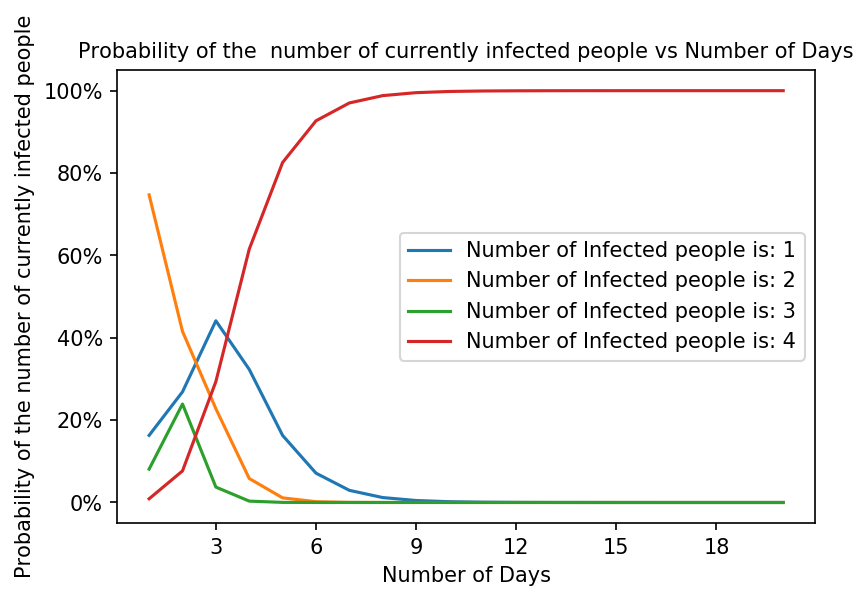

In [267]:
unittest_StateBase(20,Trans_Matrix,temp,res)

### 4.3 Steady State<a name="043"></a>

Initial State:  (0, 0, 2, 0)
At day  0 , the probability of  4  people who got infected is  0.0
At day  1 , the probability of  4  people who got infected is  0.6544800000000001
At day  2 , the probability of  4  people who got infected is  0.7434973799999998
At day  3 , the probability of  4  people who got infected is  0.7513019263115998
At day  4 , the probability of  4  people who got infected is  0.7519363476701179
At day  5 , the probability of  4  people who got infected is  0.7519872343360171
At day  6 , the probability of  4  people who got infected is  0.7519913069228374
At day  7 , the probability of  4  people who got infected is  0.7519916327495585
At day  8 , the probability of  4  people who got infected is  0.751991658815926
At day  9 , the probability of  4  people who got infected is  0.7519916609012387
At day  10 , the probability of  4  people who got infected is  0.7519916610680639
At day  11 , the probability of  4  people who got infected is  0.7519916610814096
A

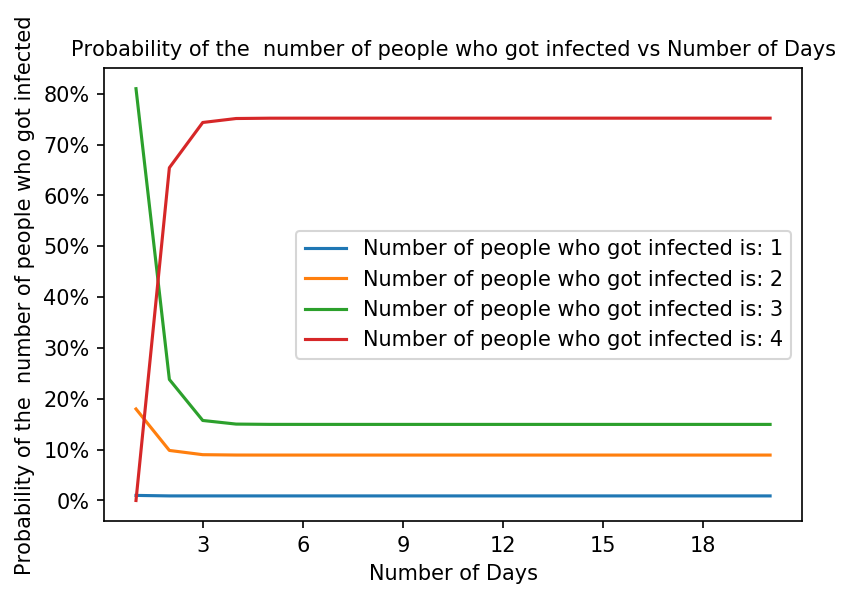

In [268]:
unittest_AllInfected(20,Trans_Matrix,temp,res)

Markov Chain model provides us another view of analysis. Markov Chain does not focus on the process, while it more focus on the state and the probability of the state, especially the steady states.<br><br>
After 20 days, the state with the largest probability is the state that everyone get recovered or killed. As you can see in the printing above, everyone's state is recovered/death.<br><br>
In this case, we talk about the steady state of the simulation. If there are four people in this small community and one of them is exposed, the probability of all of them get infected after 6 days is around 75 percent.<br><br>
## 5. Conclusion<a name="05"></a>
In this part, we talked about the Markov Chain Analysis on COVID-19 with SEIR model. By analysing the this problem, we can see that COVID-19 has fast infection rate and a small family could all get infected within few days.Due to the limitation of Markov Chain model, our implementation only focused on small community.